In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
iris=datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
#converting the dataset to pandas dataframe
iris=pd.DataFrame(data=np.c_[iris['data'],iris['target']],columns=iris['feature_names']+['target'])

In [5]:
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [6]:
species=[]
for i in range(len(iris['target'])):
    if iris['target'][i]==0:
        species.append('Setosa')
    elif iris['target'][i]==1:
        species.append('Versicolor')
    else:
        species.append('Virginica')

In [7]:
iris['species']=species#adding species into data

In [8]:
# to check if the 3 targets are equal
iris.groupby('species').size()

species
Setosa        50
Versicolor    50
Virginica     50
dtype: int64

In [9]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [10]:
iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
species              0
dtype: int64

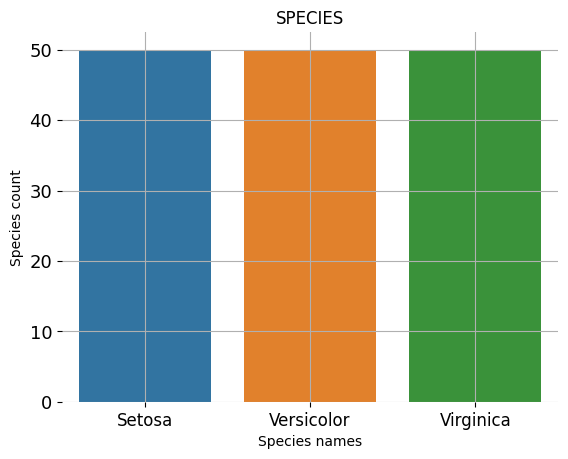

In [11]:
sns.countplot(data=iris,x='species')
plt.title('SPECIES')
plt.ylabel('Species count')
plt.xlabel('Species names')
plt.yticks(fontsize=13)
plt.xticks(fontsize=12,rotation=360)
plt.grid(True)
plt.box(False)
plt.show()

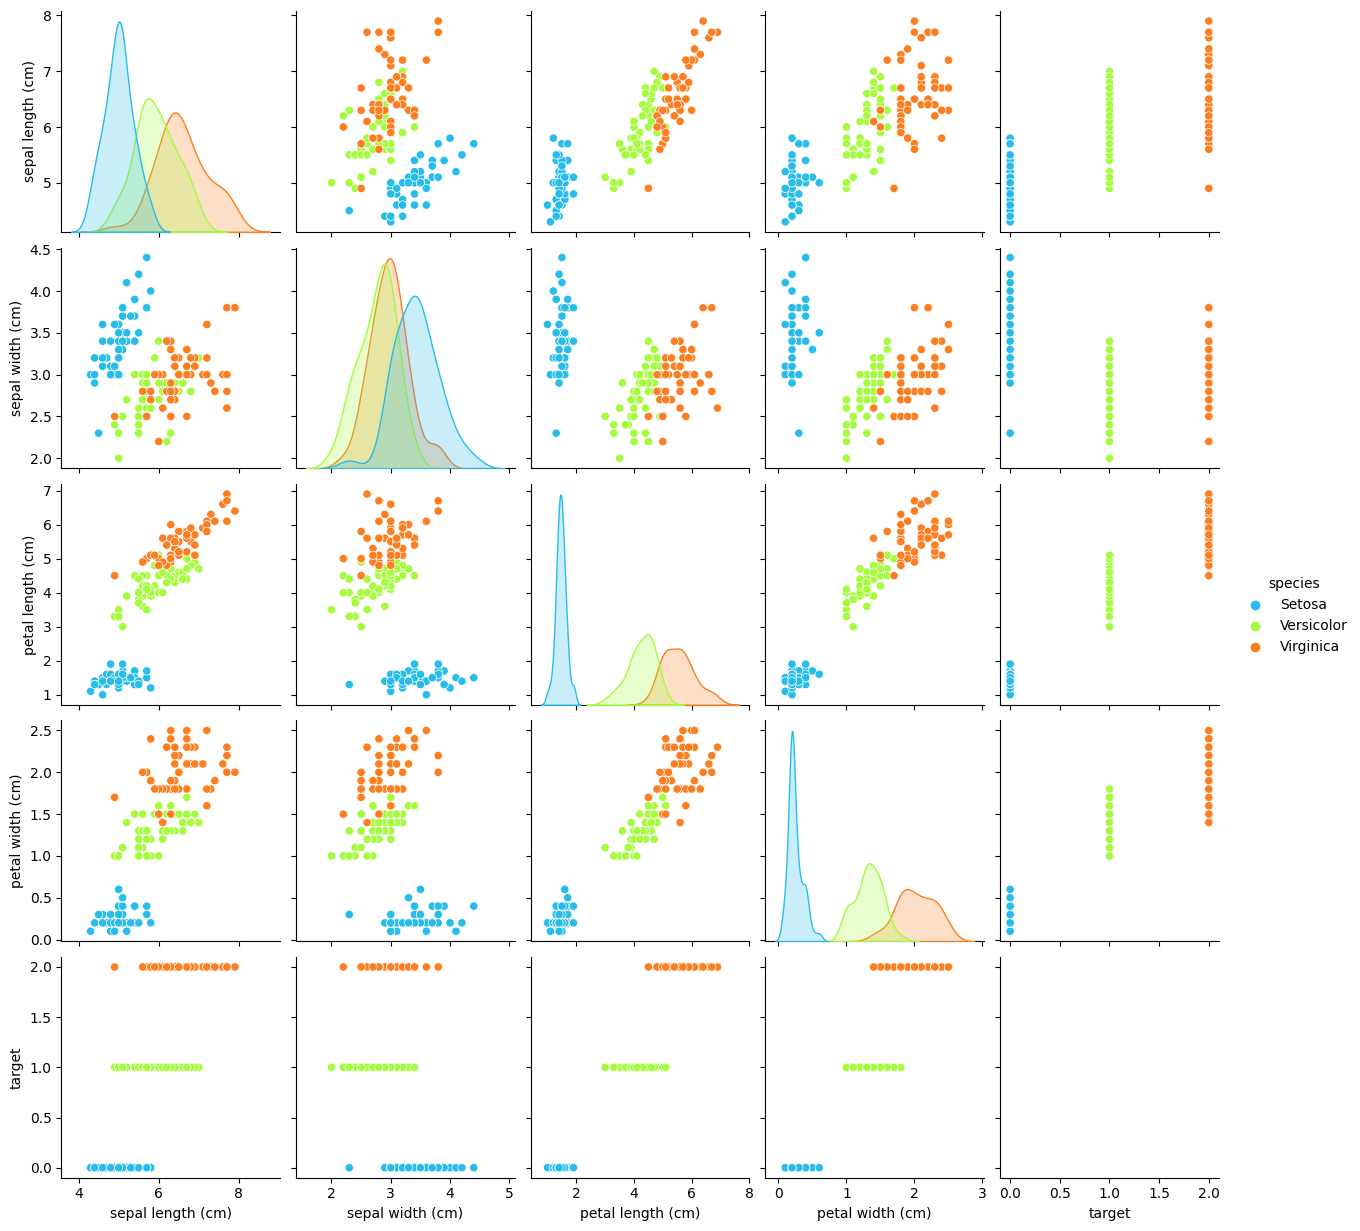

In [12]:
sns.pairplot(iris, hue='species', palette='turbo')

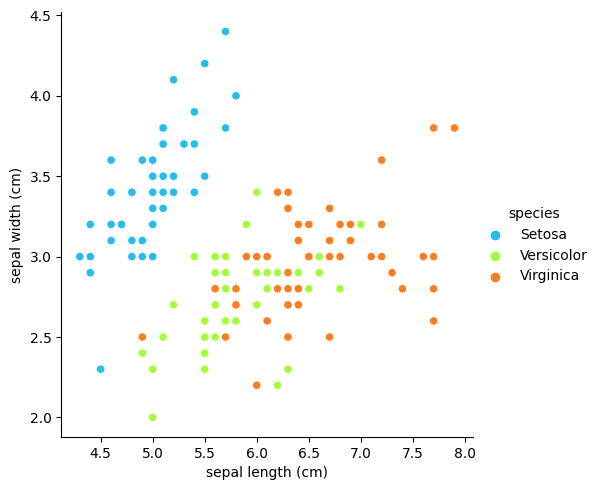

In [13]:
sns.relplot(data=iris,x="sepal length (cm)",y="sepal width (cm)",hue="species",palette='turbo')

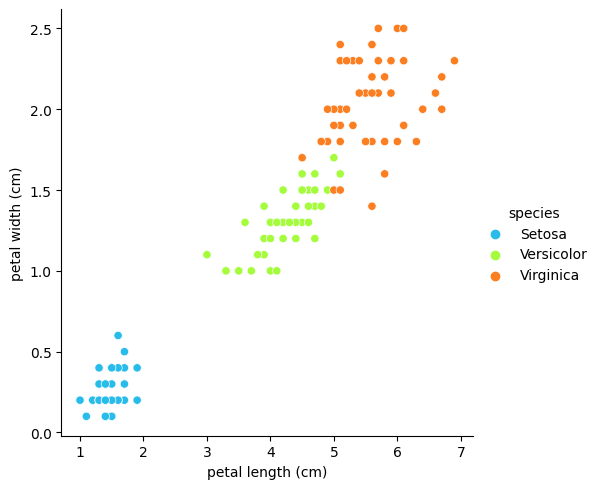

In [14]:
sns.relplot(data=iris,x="petal length (cm)",y="petal width (cm)",hue="species",palette='turbo')

In [15]:
from sklearn.model_selection import train_test_split
X=iris.drop(['target','species'],axis=1)
y=iris['target']

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=50)

In [17]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()

In [18]:
log_model.fit(X_train,y_train)

LogisticRegression()

In [19]:
pred=log_model.predict(X_test)

In [20]:
training_prediction=log_model.predict(X_train)

In [21]:
testing_prediction=log_model.predict(X_test)

In [22]:
from sklearn.metrics import classification_report,confusion_matrix

In [23]:
#performance analysis for training data
print(classification_report(y_train,training_prediction))
#performance analysis for test data
print(classification_report(y_test,testing_prediction))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        41
         1.0       0.97      0.95      0.96        38
         2.0       0.95      0.98      0.96        41

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         9
         1.0       1.00      0.92      0.96        12
         2.0       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [24]:
#performance analysis for training data
print(confusion_matrix(y_train,training_prediction))
#performance analysis for test data
print(confusion_matrix(y_test,testing_prediction))

[[41  0  0]
 [ 0 36  2]
 [ 0  1 40]]
[[ 9  0  0]
 [ 0 11  1]
 [ 0  0  9]]
